In [64]:
import pandas as pd
import numpy as np
import talib as ta
from sklearn.model_selection import train_test_split

In [66]:
df=pd.read_csv("C:\\Users\\Asus\\Desktop\\UM Master Data Science\\Data mining\\Extraction\\MXSC Historical Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 08, 2019",5.52,5.50,5.52,5.41,5.14M,0.91%
1,"May 07, 2019",5.47,5.43,5.51,5.40,10.09M,0.74%
2,"May 06, 2019",5.43,5.31,5.44,5.31,3.12M,2.07%
3,"May 03, 2019",5.32,5.30,5.35,5.29,2.03M,0.19%
4,"May 02, 2019",5.31,5.30,5.37,5.30,1.44M,-0.93%


In [67]:
df['Date']=pd.to_datetime(df['Date'],format='%b %d, %Y')
df=df.sort_values(by=['Date'])

In [68]:
import datetime as dt
df['Weekday']=df['Date'].dt.dayofweek
df['Quarter']=df['Date'].dt.quarter
df['Month']=pd.DatetimeIndex(df['Date']).month


In [69]:
df['Pct_Chg']=df['Price'].pct_change(periods=1,fill_method='ffill').shift(-2)*100
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,Pct_Chg
85,2019-01-02,5.40,5.37,5.43,5.31,1.11M,0.93%,2,1,1,1.467890
84,2019-01-03,5.45,5.42,5.47,5.35,1.24M,0.93%,3,1,1,2.350814
83,2019-01-04,5.53,5.40,5.53,5.40,1.48M,1.47%,4,1,1,-0.353357
82,2019-01-07,5.66,5.52,5.66,5.49,1.70M,2.35%,0,1,1,-3.191489
81,2019-01-08,5.64,5.67,5.73,5.53,3.61M,-0.35%,1,1,1,3.296703


In [70]:
df['lower_tail']=(df['Open']-df['Low'])/(df['Open']-df['Price'])
df['upper_tail']=(df['Open']-df['High'])/(df['Open']-df['Price'])
df['lower_tail']=df['lower_tail'].replace((np.NaN,np.inf),0)
df['upper_tail']=df['lower_tail'].replace((np.NaN,np.inf),0)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,Pct_Chg,lower_tail,upper_tail
85,2019-01-02,5.40,5.37,5.43,5.31,1.11M,0.93%,2,1,1,1.467890,-2.000000,-2.000000
84,2019-01-03,5.45,5.42,5.47,5.35,1.24M,0.93%,3,1,1,2.350814,-2.333333,-2.333333
83,2019-01-04,5.53,5.40,5.53,5.40,1.48M,1.47%,4,1,1,-0.353357,-0.000000,-0.000000
82,2019-01-07,5.66,5.52,5.66,5.49,1.70M,2.35%,0,1,1,-3.191489,-0.214286,-0.214286
81,2019-01-08,5.64,5.67,5.73,5.53,3.61M,-0.35%,1,1,1,3.296703,4.666667,4.666667


In [71]:
df['candle_body']=df['Price']/df['Open']-1

In [72]:
df['Vol.'] = (df['Vol.'].replace(r'[KM]+$', '', regex=True).astype(float) * df['Vol.'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,Pct_Chg,lower_tail,upper_tail,candle_body
85,2019-01-02,5.40,5.37,5.43,5.31,1110000.0,0.93%,2,1,1,1.467890,-2.000000,-2.000000,0.005587
84,2019-01-03,5.45,5.42,5.47,5.35,1240000.0,0.93%,3,1,1,2.350814,-2.333333,-2.333333,0.005535
83,2019-01-04,5.53,5.40,5.53,5.40,1480000.0,1.47%,4,1,1,-0.353357,-0.000000,-0.000000,0.024074
82,2019-01-07,5.66,5.52,5.66,5.49,1700000.0,2.35%,0,1,1,-3.191489,-0.214286,-0.214286,0.025362
81,2019-01-08,5.64,5.67,5.73,5.53,3610000.0,-0.35%,1,1,1,3.296703,4.666667,4.666667,-0.005291


In [73]:
df['exp20']=df['Price'].ewm(span=20, adjust=False).mean()
df['exp50']=df['Price'].ewm(span=50, adjust=False).mean()



In [74]:
df['EMA5'] = ta.EMA(df['Price'].values, timeperiod=5)
df['EMA10'] = ta.EMA(df['Price'].values, timeperiod=10)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Price'].values, timeperiod=4)
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Price'].values, timeperiod=4)
df['APO']=ta.APO(df['Price'],fastperiod=6,slowperiod=13)
df['BOP']=ta.BOP(df['Open'],df['High'],df['Low'],df['Price'])
df['CCI']=ta.CCI(df['High'],df['Low'],df['Price'],timeperiod=7)
df['RSI'] = ta.RSI(df['Price'].values, timeperiod=14)
df['OBV']=ta.OBV(df['Price'],df['Vol.'])
df['ADOSC']=ta.ADOSC(df['High'],df['Low'],df['Price'],df['Vol.'],fastperiod=3,slowperiod=10)
macd, macdsignal, macdhist = ta.MACD(df['Price'].values, fastperiod=6, slowperiod=13, signalperiod=3)
df['MACD'] = macd
df['MACDsignal'] = macdsignal
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,...,ATR,ADX,APO,BOP,CCI,RSI,OBV,ADOSC,MACD,MACDsignal
4,2019-05-02,5.31,5.30,5.37,5.30,1440000.0,-0.93%,3,2,5,...,0.091042,38.956377,-0.047821,0.142857,-71.014493,42.216803,-11735600.0,8.622728e+05,-0.034947,-0.033245
3,2019-05-03,5.32,5.30,5.35,5.29,2030000.0,0.19%,4,2,5,...,0.083281,40.152369,-0.029359,0.333333,-72.560976,42.985529,-9705600.0,7.564483e+05,-0.035669,-0.034457
2,2019-05-06,5.43,5.31,5.44,5.31,3120000.0,2.07%,0,2,5,...,0.094961,38.789222,-0.004359,0.923077,94.029851,50.747559,-6585600.0,1.484388e+06,-0.018941,-0.026699
1,2019-05-07,5.47,5.43,5.51,5.40,10090000.0,0.74%,1,2,5,...,0.098721,43.666690,0.005256,0.363636,149.365629,53.240500,3504400.0,2.522816e+06,-0.002212,-0.014456
0,2019-05-08,5.52,5.50,5.52,5.41,5140000.0,0.91%,2,2,5,...,0.101541,47.996219,0.020128,0.181818,125.364182,56.223287,8644400.0,4.353735e+06,0.015263,0.000404


In [75]:
for n,row in df.iterrows():
    if row['Pct_Chg']>=3:
        df.loc[n,'tag']=3
    elif row['Pct_Chg']>=2:
        df.loc[n,'tag']=2
    elif row['Pct_Chg']>=1:
        df.loc[n,'tag']=1
    else:
        df.loc[n,'tag']=0
df.head(20)

,Date,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,...,ADX,APO,BOP,CCI,RSI,OBV,ADOSC,MACD,MACDsignal,tag
85,2019-01-02,5.40,5.37,5.43,5.31,1110000.0,0.93%,2,1,1,...,NaN,NaN,0.250000,NaN,NaN,1110000.0,NaN,NaN,NaN,1.0
84,2019-01-03,5.45,5.42,5.47,5.35,1240000.0,0.93%,3,1,1,...,NaN,NaN,0.250000,NaN,NaN,2350000.0,NaN,NaN,NaN,2.0
83,2019-01-04,5.53,5.40,5.53,5.40,1480000.0,1.47%,4,1,1,...,NaN,NaN,1.000000,NaN,NaN,3830000.0,NaN,NaN,NaN,0.0
82,2019-01-07,5.66,5.52,5.66,5.49,1700000.0,2.35%,0,1,1,...,NaN,NaN,0.823529,NaN,NaN,5530000.0,NaN,NaN,NaN,0.0
81,2019-01-08,5.64,5.67,5.73,5.53,3610000.0,-0.35%,1,1,1,...,NaN,NaN,-0.150000,NaN,NaN,1920000.0,NaN,NaN,NaN,3.0
80,2019-01-09,5.46,5.70,5.70,5.45,2840000.0,-3.19%,2,1,1,...,NaN,NaN,-0.960000,NaN,NaN,-920000.0,NaN,NaN,NaN,1.0
79,2019-01-10,5.64,5.53,5.68,5.49,2460000.0,3.30%,3,1,1,...,NaN,NaN,0.578947,65.933446,NaN,1540000.0,NaN,NaN,NaN,0.0
78,2019-01-11,5.70,5.67,5.71,5.61,2510000.0,1.06%,4,1,1,...,56.761054,NaN,0.300000,100.253485,NaN,4050000.0,NaN,NaN,NaN,1.0
77,2019-01-14,5.64,5.58,5.70,5.58,1080000.0,-1.05%,0,1,1,...,48.012998,NaN,0.500000,59.477124,NaN,2970000.0,NaN,NaN,NaN,0.0
76,2019-01-15,5.72,5.64,5.73,5.64,3420000.0,1.42%,1,1,1,...,45.306116,NaN,0.888889,119.512195,NaN,6390000.0,2.300307e+06,NaN,NaN,0.0


In [76]:
df=df.drop(['Change %','Pct_Chg'],axis=1)
df.head()

,Date,Price,Open,High,Low,Vol.,Weekday,Quarter,Month,lower_tail,...,ADX,APO,BOP,CCI,RSI,OBV,ADOSC,MACD,MACDsignal,tag
85,2019-01-02,5.40,5.37,5.43,5.31,1110000.0,2,1,1,-2.000000,...,NaN,NaN,0.250000,NaN,NaN,1110000.0,NaN,NaN,NaN,1.0
84,2019-01-03,5.45,5.42,5.47,5.35,1240000.0,3,1,1,-2.333333,...,NaN,NaN,0.250000,NaN,NaN,2350000.0,NaN,NaN,NaN,2.0
83,2019-01-04,5.53,5.40,5.53,5.40,1480000.0,4,1,1,-0.000000,...,NaN,NaN,1.000000,NaN,NaN,3830000.0,NaN,NaN,NaN,0.0
82,2019-01-07,5.66,5.52,5.66,5.49,1700000.0,0,1,1,-0.214286,...,NaN,NaN,0.823529,NaN,NaN,5530000.0,NaN,NaN,NaN,0.0
81,2019-01-08,5.64,5.67,5.73,5.53,3610000.0,1,1,1,4.666667,...,NaN,NaN,-0.150000,NaN,NaN,1920000.0,NaN,NaN,NaN,3.0


In [77]:
X=df.iloc[:,1:-1].fillna(0)
X.head()

,Price,Open,High,Low,Vol.,Weekday,Quarter,Month,lower_tail,upper_tail,...,ATR,ADX,APO,BOP,CCI,RSI,OBV,ADOSC,MACD,MACDsignal
85,5.40,5.37,5.43,5.31,1110000.0,2,1,1,-2.000000,-2.000000,...,0.000,0.0,0.0,0.250000,0.0,0.0,1110000.0,0.0,0.0,0.0
84,5.45,5.42,5.47,5.35,1240000.0,3,1,1,-2.333333,-2.333333,...,0.000,0.0,0.0,0.250000,0.0,0.0,2350000.0,0.0,0.0,0.0
83,5.53,5.40,5.53,5.40,1480000.0,4,1,1,-0.000000,-0.000000,...,0.000,0.0,0.0,1.000000,0.0,0.0,3830000.0,0.0,0.0,0.0
82,5.66,5.52,5.66,5.49,1700000.0,0,1,1,-0.214286,-0.214286,...,0.000,0.0,0.0,0.823529,0.0,0.0,5530000.0,0.0,0.0,0.0
81,5.64,5.67,5.73,5.53,3610000.0,1,1,1,4.666667,4.666667,...,0.155,0.0,0.0,-0.150000,0.0,0.0,1920000.0,0.0,0.0,0.0


In [78]:
from sklearn import preprocessing
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled,columns=X.columns)
X.head()

,Price,Open,High,Low,Vol.,Weekday,Quarter,Month,lower_tail,upper_tail,...,ATR,ADX,APO,BOP,CCI,RSI,OBV,ADOSC,MACD,MACDsignal
0,0.290909,0.188679,0.26,0.169811,0.082803,0.50,0.0,0.0,0.375000,0.375000,...,0.000000,0.0,0.545455,0.625000,0.525102,0.0,0.433488,0.193471,0.538169,0.50037
1,0.381818,0.283019,0.34,0.245283,0.096081,0.75,0.0,0.0,0.354167,0.354167,...,0.000000,0.0,0.545455,0.625000,0.525102,0.0,0.475333,0.193471,0.538169,0.50037
2,0.527273,0.245283,0.46,0.339623,0.120594,1.00,0.0,0.0,0.500000,0.500000,...,0.000000,0.0,0.545455,1.000000,0.525102,0.0,0.525277,0.193471,0.538169,0.50037
3,0.763636,0.471698,0.72,0.509434,0.143064,0.00,0.0,0.0,0.486607,0.486607,...,0.000000,0.0,0.545455,0.911765,0.525102,0.0,0.582646,0.193471,0.538169,0.50037
4,0.727273,0.754717,0.86,0.584906,0.338147,0.25,0.0,0.0,0.791667,0.791667,...,0.819835,0.0,0.545455,0.425000,0.525102,0.0,0.460823,0.193471,0.538169,0.50037


In [79]:
y_cls=df.tag.astype('int')
#y_rgs=df.target_rgs.fillna(0)
y_cls.head()

85    1
84    2
83    0
82    0
81    3
Name: tag, dtype: int32

In [80]:
y=y_cls
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)

In [81]:
print (X_cls_train.shape, y_cls_train.shape)
print (X_cls_test.shape, y_cls_test.shape)

(60, 25) (60,)
(26, 25) (26,)


In [96]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=6)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
clf = clf.fit(X_cls_train, y_cls_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
predictors_list=list(X_cls_train)

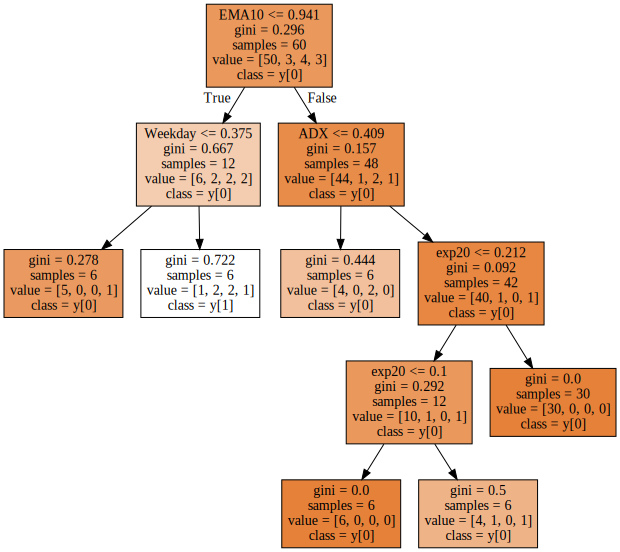

In [99]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,class_names=True,filled=True,feature_names=predictors_list)
graphviz.Source(dot_data)

In [86]:
y_cls_pred = clf.predict(X_cls_test)
y_cls_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1])

In [87]:
from sklearn.metrics import classification_report
report = classification_report(y_cls_test, y_cls_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        22
           1       0.11      1.00      0.20         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1

   micro avg       0.65      0.65      0.65        26
   macro avg       0.26      0.43      0.26        26
weighted avg       0.80      0.65      0.70        26



C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
rf=rf.fit(X_cls_train, y_cls_train)

In [106]:
rf_cls_pred=rf.predict(X_cls_test)

In [107]:
rf_report = classification_report(y_cls_test, rf_cls_pred)
print(rf_report)

             precision    recall  f1-score   support

          0       0.88      0.95      0.91        22
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         1

avg / total       0.74      0.81      0.77        26



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Test code

In [115]:
test=pd.read_csv("C:\\Users\\Asus\\Desktop\\UM Master Data Science\\Data mining\\Extraction\\MXSC Historical Data test.csv")

In [116]:
test['Date']=pd.to_datetime(test['Date'],format='%b %d, %Y')
test=test.sort_values(by=['Date'])

In [117]:
import datetime as dt
test['Weekday']=test['Date'].dt.dayofweek
test['Quarter']=test['Date'].dt.quarter
test['Month']=pd.DatetimeIndex(test['Date']).month


In [118]:
test['Pct_Chg']=test['Price'].pct_change(periods=1,fill_method='ffill').shift(-2)*100
test.head()

,Date,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,Pct_Chg
12,2019-05-09,5.36,5.47,5.52,5.36,2.80M,-2.90%,3,2,5,0.000000
11,2019-05-10,5.36,5.35,5.44,5.35,1.34M,0.00%,4,2,5,-0.932836
10,2019-05-13,5.36,5.35,5.44,5.35,2.78M,0.00%,0,2,5,0.188324
9,2019-05-14,5.31,5.30,5.36,5.25,3.72M,-0.93%,1,2,5,-0.375940
8,2019-05-15,5.32,5.30,5.35,5.30,1.52M,0.19%,2,2,5,1.132075


In [119]:
test['lower_tail']=(test['Open']-test['Low'])/(test['Open']-test['Price'])
test['upper_tail']=(test['Open']-test['High'])/(test['Open']-test['Price'])
test['lower_tail']=test['lower_tail'].replace((np.NaN,np.inf),0)
test['upper_tail']=test['lower_tail'].replace((np.NaN,np.inf),0)
test.head()

,Date,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,Pct_Chg,lower_tail,upper_tail
12,2019-05-09,5.36,5.47,5.52,5.36,2.80M,-2.90%,3,2,5,0.000000,1.0,1.0
11,2019-05-10,5.36,5.35,5.44,5.35,1.34M,0.00%,4,2,5,-0.932836,-0.0,-0.0
10,2019-05-13,5.36,5.35,5.44,5.35,2.78M,0.00%,0,2,5,0.188324,-0.0,-0.0
9,2019-05-14,5.31,5.30,5.36,5.25,3.72M,-0.93%,1,2,5,-0.375940,-5.0,-5.0
8,2019-05-15,5.32,5.30,5.35,5.30,1.52M,0.19%,2,2,5,1.132075,-0.0,-0.0


In [120]:
test['candle_body']=test['Price']/test['Open']-1

In [121]:
test['Vol.'] = (test['Vol.'].replace(r'[KM]+$', '', regex=True).astype(float) * test['Vol.'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
test.head()

,Date,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,Pct_Chg,lower_tail,upper_tail,candle_body
12,2019-05-09,5.36,5.47,5.52,5.36,2800000.0,-2.90%,3,2,5,0.000000,1.0,1.0,-0.020110
11,2019-05-10,5.36,5.35,5.44,5.35,1340000.0,0.00%,4,2,5,-0.932836,-0.0,-0.0,0.001869
10,2019-05-13,5.36,5.35,5.44,5.35,2780000.0,0.00%,0,2,5,0.188324,-0.0,-0.0,0.001869
9,2019-05-14,5.31,5.30,5.36,5.25,3720000.0,-0.93%,1,2,5,-0.375940,-5.0,-5.0,0.001887
8,2019-05-15,5.32,5.30,5.35,5.30,1520000.0,0.19%,2,2,5,1.132075,-0.0,-0.0,0.003774


In [122]:
test['exp20']=test['Price'].ewm(span=20, adjust=False).mean()
test['exp50']=test['Price'].ewm(span=50, adjust=False).mean()



In [123]:
test['EMA5'] = ta.EMA(test['Price'].values, timeperiod=5)
test['EMA10'] = ta.EMA(test['Price'].values, timeperiod=10)
test['ATR'] = ta.ATR(test['High'].values, test['Low'].values, test['Price'].values, timeperiod=4)
test['ADX'] = ta.ADX(test['High'].values, test['Low'].values, test['Price'].values, timeperiod=4)
test['APO']=ta.APO(test['Price'],fastperiod=6,slowperiod=13)
test['BOP']=ta.BOP(test['Open'],test['High'],test['Low'],test['Price'])
test['CCI']=ta.CCI(test['High'],test['Low'],test['Price'],timeperiod=7)
test['RSI'] = ta.RSI(test['Price'].values, timeperiod=14)
test['OBV']=ta.OBV(test['Price'],test['Vol.'])
test['ADOSC']=ta.ADOSC(test['High'],test['Low'],test['Price'],test['Vol.'],fastperiod=3,slowperiod=10)
macd, macdsignal, macdhist = ta.MACD(test['Price'].values, fastperiod=6, slowperiod=13, signalperiod=3)
test['MACD'] = macd
test['MACDsignal'] = macdsignal
test.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,...,ATR,ADX,APO,BOP,CCI,RSI,OBV,ADOSC,MACD,MACDsignal
4,2019-05-23,5.39,5.39,5.42,5.29,3820000.0,0.56%,3,2,5,...,0.099355,35.825844,NaN,0.000000,74.666667,NaN,4630000.0,NaN,NaN,NaN
3,2019-05-24,5.37,5.33,5.43,5.33,1550000.0,-0.37%,4,2,5,...,0.099517,39.065615,NaN,0.400000,115.046296,NaN,3080000.0,8.502001e+04,NaN,NaN
2,2019-05-27,5.36,5.33,5.42,5.33,501800.0,-0.19%,0,2,5,...,0.097137,41.495443,NaN,0.333333,73.278237,NaN,2578200.0,1.478416e+05,NaN,NaN
1,2019-05-28,5.55,5.41,5.55,5.32,8210000.0,3.54%,1,2,5,...,0.130353,52.938886,NaN,0.608696,225.806452,NaN,10788200.0,2.772374e+06,NaN,NaN
0,2019-05-29,5.58,5.45,5.58,5.45,3280000.0,0.54%,2,2,5,...,0.130265,62.119145,0.051923,1.000000,152.836053,NaN,14068200.0,4.637649e+06,NaN,NaN


In [124]:
test=test.iloc[:,1:-1].fillna(0)
test.head()

,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,Pct_Chg,...,EMA10,ATR,ADX,APO,BOP,CCI,RSI,OBV,ADOSC,MACD
12,5.36,5.47,5.52,5.36,2800000.0,-2.90%,3,2,5,0.000000,...,0.0,0.000,0.0,0.0,-0.687500,0.0,0.0,2800000.0,0.0,0.0
11,5.36,5.35,5.44,5.35,1340000.0,0.00%,4,2,5,-0.932836,...,0.0,0.000,0.0,0.0,0.111111,0.0,0.0,2800000.0,0.0,0.0
10,5.36,5.35,5.44,5.35,2780000.0,0.00%,0,2,5,0.188324,...,0.0,0.000,0.0,0.0,0.111111,0.0,0.0,2800000.0,0.0,0.0
9,5.31,5.30,5.36,5.25,3720000.0,-0.93%,1,2,5,-0.375940,...,0.0,0.000,0.0,0.0,0.090909,0.0,0.0,-920000.0,0.0,0.0
8,5.32,5.30,5.35,5.30,1520000.0,0.19%,2,2,5,1.132075,...,0.0,0.085,0.0,0.0,0.400000,0.0,0.0,600000.0,0.0,0.0


In [126]:
for n,row in test.iterrows():
    if row['Pct_Chg']>=3:
        test.loc[n,'tag']=3
    elif row['Pct_Chg']>=2:
        test.loc[n,'tag']=2
    elif row['Pct_Chg']>=1:
        test.loc[n,'tag']=1
    else:
        test.loc[n,'tag']=0
test.head(20)

,Price,Open,High,Low,Vol.,Change %,Weekday,Quarter,Month,Pct_Chg,...,ATR,ADX,APO,BOP,CCI,RSI,OBV,ADOSC,MACD,tag
12,5.36,5.47,5.52,5.36,2800000.0,-2.90%,3,2,5,0.000000,...,0.000000,0.000000,0.000000,-0.687500,0.000000,0.0,2800000.0,0.000000e+00,0.0,0.0
11,5.36,5.35,5.44,5.35,1340000.0,0.00%,4,2,5,-0.932836,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.0,2800000.0,0.000000e+00,0.0,0.0
10,5.36,5.35,5.44,5.35,2780000.0,0.00%,0,2,5,0.188324,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.0,2800000.0,0.000000e+00,0.0,0.0
9,5.31,5.30,5.36,5.25,3720000.0,-0.93%,1,2,5,-0.375940,...,0.000000,0.000000,0.000000,0.090909,0.000000,0.0,-920000.0,0.000000e+00,0.0,0.0
8,5.32,5.30,5.35,5.30,1520000.0,0.19%,2,2,5,1.132075,...,0.085000,0.000000,0.000000,0.400000,0.000000,0.0,600000.0,0.000000e+00,0.0,1.0
7,5.30,5.31,5.39,5.30,1720000.0,-0.38%,3,2,5,0.000000,...,0.086250,0.000000,0.000000,-0.111111,0.000000,0.0,-1120000.0,0.000000e+00,0.0,0.0
6,5.36,5.29,5.40,5.29,1930000.0,1.13%,4,2,5,0.559701,...,0.092188,0.000000,0.000000,0.636364,-11.814346,0.0,810000.0,0.000000e+00,0.0,0.0
5,5.36,5.31,5.38,5.30,1400000.0,0.00%,1,2,5,-0.371058,...,0.089141,34.075151,0.000000,0.625000,1.414141,0.0,810000.0,0.000000e+00,0.0,0.0
4,5.39,5.39,5.42,5.29,3820000.0,0.56%,3,2,5,-0.186220,...,0.099355,35.825844,0.000000,0.000000,74.666667,0.0,4630000.0,0.000000e+00,0.0,0.0
3,5.37,5.33,5.43,5.33,1550000.0,-0.37%,4,2,5,3.544776,...,0.099517,39.065615,0.000000,0.400000,115.046296,0.0,3080000.0,8.502001e+04,0.0,3.0


In [127]:
test=test.drop(['Change %','Pct_Chg'],axis=1)
test.head()

,Price,Open,High,Low,Vol.,Weekday,Quarter,Month,lower_tail,upper_tail,...,ATR,ADX,APO,BOP,CCI,RSI,OBV,ADOSC,MACD,tag
12,5.36,5.47,5.52,5.36,2800000.0,3,2,5,1.0,1.0,...,0.000,0.0,0.0,-0.687500,0.0,0.0,2800000.0,0.0,0.0,0.0
11,5.36,5.35,5.44,5.35,1340000.0,4,2,5,-0.0,-0.0,...,0.000,0.0,0.0,0.111111,0.0,0.0,2800000.0,0.0,0.0,0.0
10,5.36,5.35,5.44,5.35,2780000.0,0,2,5,-0.0,-0.0,...,0.000,0.0,0.0,0.111111,0.0,0.0,2800000.0,0.0,0.0,0.0
9,5.31,5.30,5.36,5.25,3720000.0,1,2,5,-5.0,-5.0,...,0.000,0.0,0.0,0.090909,0.0,0.0,-920000.0,0.0,0.0,0.0
8,5.32,5.30,5.35,5.30,1520000.0,2,2,5,-0.0,-0.0,...,0.085,0.0,0.0,0.400000,0.0,0.0,600000.0,0.0,0.0,1.0


In [128]:
from sklearn import preprocessing
test_x = test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
text_x_scaled = min_max_scaler.fit_transform(test_x)
test = pd.DataFrame(text_x_scaled,columns=test.columns)
test.head()

,Price,Open,High,Low,Vol.,Weekday,Quarter,Month,lower_tail,upper_tail,...,ATR,ADX,APO,BOP,CCI,RSI,OBV,ADOSC,MACD,tag
0,0.214286,1.000000,0.739130,0.55,0.298150,0.75,0.0,0.0,1.000000,1.000000,...,0.000000,0.0,0.0,0.000000,0.049719,0.0,0.258095,0.0,0.0,0.000000
1,0.214286,0.333333,0.391304,0.50,0.108741,1.00,0.0,0.0,0.833333,0.833333,...,0.000000,0.0,0.0,0.473251,0.049719,0.0,0.258095,0.0,0.0,0.000000
2,0.214286,0.333333,0.391304,0.50,0.295555,0.00,0.0,0.0,0.833333,0.833333,...,0.000000,0.0,0.0,0.473251,0.049719,0.0,0.258095,0.0,0.0,0.000000
3,0.035714,0.055556,0.043478,0.00,0.417503,0.25,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.461279,0.049719,0.0,0.013168,0.0,0.0,0.000000
4,0.071429,0.055556,0.000000,0.25,0.132093,0.50,0.0,0.0,0.833333,0.833333,...,0.652075,0.0,0.0,0.644444,0.049719,0.0,0.113246,0.0,0.0,0.333333


In [129]:
test_y_cls=test.tag.astype('int')
#y_rgs=df.target_rgs.fillna(0)
test_y_cls.head()

0    0
1    0
2    0
3    0
4    0
Name: tag, dtype: int32

In [131]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=6)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
clf.fit(X_cls_train, test_y_cls)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
test_pred=clf.predict(test)
report = classification_report(test_y_cls, test_pred)
print(report)

             precision    recall  f1-score   support

          0       1.00      0.55      0.71        11
          1       0.14      1.00      0.25         1
          3       0.00      0.00      0.00         1

avg / total       0.86      0.54      0.62        13



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
for i in range(len(test)):
    print("X= ",test[i], "Predicted= ",test_pred[i])

KeyError: 0

In [ ]:
def score_new(features,clf):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    return(score)